In [12]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p

In [18]:
#Arch1-256
#Arch2-128
#Arch3-64
#Arch4-32

#All layers have 1024,512,128

initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)
#print(Input_train_Dataset.shape,'\n')

#
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
'''bottleneck dimension'''
encodingDim=64
print(Input_train_Dataset.shape)

(11385, 28, 28)


In [16]:
xInp=Input(shape=(28,28),name="img")
inp=Flatten(input_shape=(28, 28), name='InputLayer')(xInp)

hl1=Dense(400,activation='sigmoid')(inp)

encodedOut=Dense(encodingDim,activation='sigmoid')(hl1)

Encoder1=Model(xInp,encodedOut,name='encoder')

hl3=Dense(400,activation='sigmoid')(encodedOut)

decodedOut=Dense(784,activation='sigmoid')(hl3)
out=Reshape((28,28))(decodedOut)
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder1=Model(xInp,out,name='AutoencoderA1')
Autoencoder1.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=10,verbose=1)

Autoencoder1.compile(optimizer, loss='mse',metrics=['accuracy'])
ae1history=Autoencoder1.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 100, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#validation_batch_size=1

Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dense_7 (Dense)             (None, 64)                25664     
                                                                 
 dense_8 (Dense)             (None, 400)               26000     
                                                                 
 dense_9 (Dense)             (None, 784)               314384    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)          

356/356 [==============================] - 2s 7ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 69/100
356/356 [==============================] - 3s 7ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 70/100
356/356 [==============================] - 3s 7ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 71/100
356/356 [==============================] - 2s 7ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 72/100
356/356 [==============================] - 2s 7ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 73/100
356/356 [==============================] - 3s 8ms/step - loss: 0.0039 - val_loss: 0.0050
Epoch 74/100
356/356 [==============================] - 2s 7ms/step - loss: 0.0039 - val_loss: 0.0049
Epoch 75/100
356/356 [==============================] - 2s 7ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 76/100
356/356 [==============================] - 2s 7ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 77/100
356/356 [==============================] - 2s 7ms/step - loss: 0.0038 - val_loss: 

356/356 [==============================] - 1s 2ms/step


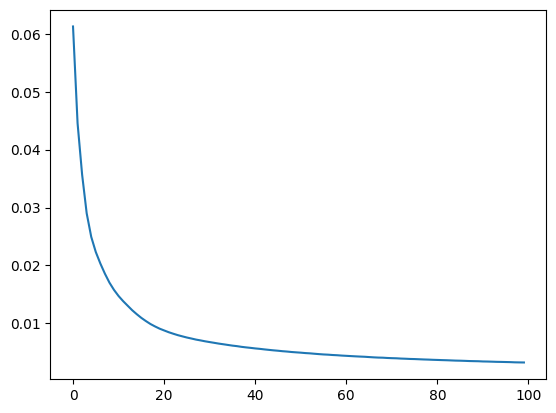

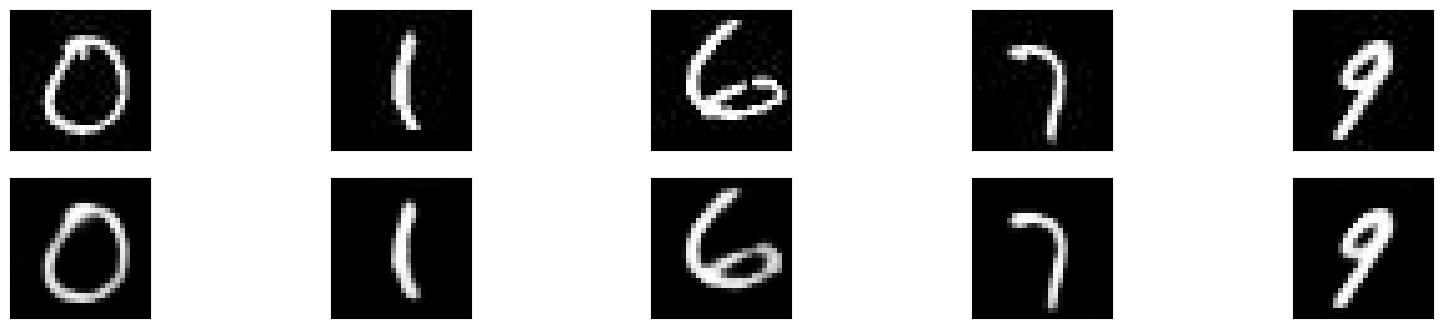

In [23]:
'''visualization-Task2-d'''
trainReconstruct=Autoencoder1.predict(Input_train_Dataset)
plt.plot(ae1history.history['loss'])
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [25]:
#Task3
#trainEncode=a1Encoder.predict(Input_train_Dataset)
#Dataset used for prediction and evaluation in FCNN-Encoded data
trainEncode=Encoder1.predict(Input_train_Dataset)
valEncode=Encoder1.predict(Input_val_Dataset)
testEncode=Encoder1.predict(Input_test_Dataset)

#Fcnn
model = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit = model.fit(x = trainEncode, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode,  Output_val), validation_batch_size=1)

model.save('/Users/vds/Downloads/modelAssign4/ae64.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histae64.pckl','wb')
p.dump(model_fit.history,f)
f.close()

119/119 [==============================] - 0s 2ms/step
Epoch 1/10000
356/356 [==============================] - 8s 19ms/step - loss: 0.6701 - accuracy: 0.7309 - val_loss: 0.1917 - val_accuracy: 0.9339
Epoch 2/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1802 - accuracy: 0.9369 - val_loss: 0.1444 - val_accuracy: 0.9515
Epoch 3/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1642 - accuracy: 0.9441 - val_loss: 0.2120 - val_accuracy: 0.9331
Epoch 4/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1485 - accuracy: 0.9472 - val_loss: 0.1365 - val_accuracy: 0.9531
Epoch 5/10000
356/356 [==============================] - 5s 14ms/step - loss: 0.1323 - accuracy: 0.9540 - val_loss: 0.1124 - val_accuracy: 0.9613
Epoch 6/10000
356/356 [==============================] - 5s 15ms/step - loss: 0.1305 - accuracy: 0.9534 - val_loss: 0.1239 - val_accuracy: 0.9605
Epoch 7/10000
356/356 [==============================] - 5s 14ms/step

In [26]:
#FCNN Error
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainEncode,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valEncode, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testEncode, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testEncode, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)


Evaluation of model on train data:
11385/11385 [==============================] - 11s 954us/step - loss: 0.0206 - accuracy: 0.9930
['loss', 'accuracy']
[0.02057581953704357, 0.9929732084274292]

Evaluation of model on validation data:
3795/3795 [==============================] - 3s 772us/step - loss: 0.0576 - accuracy: 0.9818
['loss', 'accuracy']
[0.057575199753046036, 0.9818181991577148]

Evaluation of model on test data:
3795/3795 [==============================] - 3s 899us/step - loss: 0.0671 - accuracy: 0.9818
['loss', 'accuracy']
[0.06705709546804428, 0.9818181991577148]

Predictions for test data:
3795/3795 [==============================] - 3s 720us/step
[4 4 4 ... 1 1 1]


In [28]:
#3-3
confusionMatrix=tf.math.confusion_matrix(Output_test, pred)
print(confusionMatrix)          

tf.Tensor(
[[747   0   7   1   4]
 [  2 749   2   4   2]
 [  5   3 750   0   1]
 [  1   4   1 738  15]
 [  4   1   0  12 742]], shape=(5, 5), dtype=int32)
